In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy import *
from scipy import *
from qutip import *

In [5]:
# Define atomic states
# Use ordering from paper
state2 = basis(3,0)
excited = basis(3,1)
ground = basis(3,2)

# Set where to truncate Fock state for cavity
N = 30

# Create the atomic operators needed for the Hamiltonian
# |g><e|
sigma_ge = tensor(qeye(N), ground * excited.dag())
# |e><2|
sigma_e2 = tensor(qeye(N), excited * state2.dag())
# |g><2|
sigma_g2 = tensor(qeye(N), ground * state2.dag())

# Create the photon operator
a = tensor(destroy(N), qeye(3))
ada = tensor(num(N), qeye(3))

In [6]:
# Define collapse operators
c_ops = []
# Cavity decay rate
kappa = 0.04
c_ops.append(sqrt(kappa) * a)

# Atomic decay rate
gamma1 = 1.3164239028e-6
gamma2 = 1e7 * gamma1
c_ops.append(sqrt(gamma1) * sigma_ge)
c_ops.append(sqrt(gamma2) * sigma_e2)

In [30]:
rho0 = tensor(basis(N,2),excited) #AMCD

g = 0.2
Omega = 10 * kappa

# Hamiltonian
H = g * (sigma_ge.dag() * a + a.dag() * sigma_ge) + 0.5 * Omega * (sigma_g2 + sigma_g2.dag())

taus = linspace(0, 2e2, 2e2)

g2, G2 = coherence_function_g2(H, rho0, taus, c_ops, a)  #AMCD

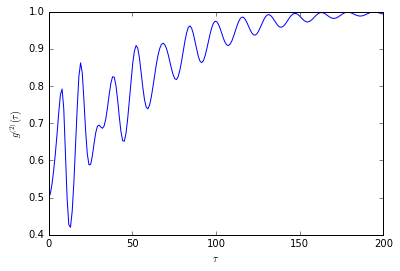

In [31]:
fig, ax = plt.subplots(1, 1)

#ax.plot(taus, real(g2), label='g='+str(g)+', amplitude='+str(real(max(g2)-min(g2))), lw=2)
ax.plot(taus, real(g2))

#ax.legend(loc=0)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$g^{(2)}(\tau)$')
#plt.savefig('g2tau.png')

In [ ]:
wlist = linspace(-8, 8, 200000) * kappa
spec = spectrum(H, wlist, c_ops, a.dag(), a)

In [11]:
plt.plot(spec)

Quantum object: dims = [[30, 3], [1, 1]], shape = [90, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

In [ ]:
print(qutip.__version__)

import sys
print(sys.version)